Riva Poudel

Fall 2021

DSP 310

Final Project

In [ ]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/My Drive/CSC310/notes/"
    user_home = "/content/drive/My Drive/"
    
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook


Mounted at /content/drive


In [ ]:
# basic data routines
import pandas as pd
import numpy as np

# model
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn.svm import SVC

# model evaluation routines
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

#Code that installs the moduele for decison tree
import sys
if 'google.colab' in sys.modules:
  !pip install -q dtreeviz
  
# decision tree
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

#import matplotlib
import matplotlib.pyplot as plt


     |████████████████████████████████| 62 kB 740 kB/s 


#The Data Set

*The data set :* https://vincentarelbundock.github.io/Rdatasets/doc/AER/Affairs.html

*Description :* Infidelity data, known as Fair's Affairs. Cross-section data from a survey conducted by Psychology Today in 1969.

*Usage :* data("Affairs")

*Format :* A data frame containing 601 observations on 9 variables.

*Variables :*

**affairs** (numeric) - How often engaged in extramarital sexual intercourse during the past year? 0 = none, 1 = once, 2 = twice, 3 = 3 times, 7 = 4–10 times, 12 = monthly, 12 = weekly, 12 = daily.

**gender** - factor indicating gender.

**age** - (numeric) coding age in years: 17.5 = under 20, 22 = 20–24, 27 = 25–29, 32 = 30–34, 37 = 35–39, 42 = 40–44, 47 = 45–49, 52 = 50–54, 57 = 55 or over.

**yearsmarried** (numeric) - coding number of years married: 0.125 = 3 months or less, 0.417 = 4–6 months, 0.75 = 6 months–1 year, 1.5 = 1–2 years, 4 = 3–5 years, 7 = 6–8 years, 10 = 9–11 years, 15 = 12 or more years.

**children** - Are there children in the marriage?

**religiousness** (numeric) - coding religiousness: 1 = anti, 2 = not at all, 3 = slightly, 4 = somewhat, 5 = very.

**education** - (numeric) coding level of education: 9 = grade school, 12 = high school graduate, 14 = some college, 16 = college graduate, 17 = some graduate work, 18 = master's degree, 20 = Ph.D., M.D., or other advanced degree.

**occupation** (numeric) - coding occupation according to Hollingshead classification (reverse numbering).

**rating** (numeric) - coding self rating of marriage: 1 = very unhappy, 2 = somewhat unhappy, 3 = average, 4 = happier than average, 5 = very happy.




---



**It should be noted:** The variables in this data set may be numerical in presentation, but they are actually representations of the data on a given scale. Additionally, each numeric variable has a different scale in which it is measured. Because of this, during our analysis, we must be careful and keep in mind that the data is represented in a specfic manner, and we must reference the scales described above in order to accuratly understand the data.

In [ ]:
# get data
df = pd.read_csv('/content/drive/MyDrive/CSC310/Affairs.csv')

#Cleaning the Data Set 

In [ ]:
df.columns

Index(['Unnamed: 0', 'affairs', 'gender', 'age', 'yearsmarried', 'children',
       'religiousness', 'education', 'occupation', 'rating'],
      dtype='object')

In [ ]:
#Overall Missing Values
df.isnull().values.sum()

0

In [ ]:
#Overall duplicated data
df.duplicated().values.sum()

0

Our analysis of the data set shows that the data set is clean for any missing or duplicate entries. Thus, we can go ahead and drop the Unnamed: 0 column. This is because the column is only a counter for the rows in the data set, something that is unnecessary for our analysis. 

In [ ]:
df = df.drop(['Unnamed: 0'], axis= 1)

#Analysis of the Variables

In [ ]:
df.columns

Index(['affairs', 'gender', 'age', 'yearsmarried', 'children', 'religiousness',
       'education', 'occupation', 'rating'],
      dtype='object')

There are **9 columns** and **601 rows** in this data set. 

In [ ]:
df.head()

affairs  gender   age  ...  education occupation  rating
0        0    male  37.0  ...         18          7       4
1        0  female  27.0  ...         14          6       4
2        0  female  32.0  ...         12          1       4
3        0    male  57.0  ...         18          6       5
4        0    male  22.0  ...         17          6       3

[5 rows x 9 columns]

In [ ]:
df.dtypes

affairs            int64
gender            object
age              float64
yearsmarried     float64
children          object
religiousness      int64
education          int64
occupation         int64
rating             int64
dtype: object

The majority of the variables in this data set, are numeric. However, we should keep in mind that the numbers themselves are representations of different calculations. Some variables, like 'religousness' are numbers that represent a scale of how religious the person is. This is different from the variable 'age'. 'Age' is represented as a float variable, and is not the exact age of the person. Instead, it is a number that represents their age on a scale *between* ages. 


This distinction between the different numbers represented in the data set is important when trying to understand *what* exactly the data set is trying to communicate. 

In [ ]:
df.describe

<bound method NDFrame.describe of      affairs  gender   age  ...  education occupation  rating
0          0    male  37.0  ...         18          7       4
1          0  female  27.0  ...         14          6       4
2          0  female  32.0  ...         12          1       4
3          0    male  57.0  ...         18          6       5
4          0    male  22.0  ...         17          6       3
..       ...     ...   ...  ...        ...        ...     ...
596        1    male  22.0  ...         12          2       5
597        7  female  32.0  ...         18          5       4
598        2    male  32.0  ...         17          6       5
599        2    male  22.0  ...         18          6       2
600        1  female  32.0  ...         14          1       5

[601 rows x 9 columns]>

The target variable for our data set is 'affairs'. This variable represents a scale of how often the someone in the data set had an extramarital affair. 

#Summary Statistic

A histogram of the numeric variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04178d1650>,
      dtype=object)

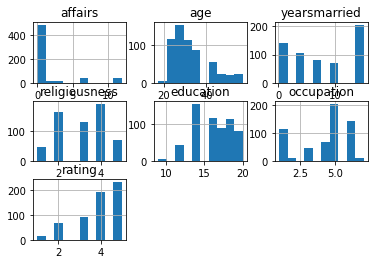

In [ ]:
df.hist()

From a priminary overlook of the data, we see that the clusters of the various histograms are the age and education. We could attribute this to the fact that the scales of these two variables, are more continous. We could also attribute it to the fact that a majority of the participants are newly married, or finished school before marriage. Both reasons can be attributed to the clusters and spikes present in the graph. 

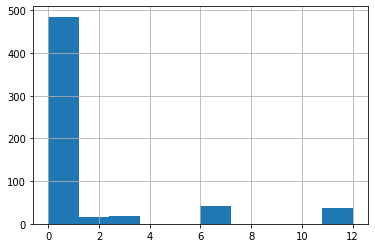

In [ ]:
df['affairs'].hist()

By taking a closer look at our target variable, affairs, we see that a majority of the participants in the data set either have not had an affair, or have had an affair only once. 

In [ ]:
(df['affairs'].values == 0).sum()

451

In [ ]:
(df['affairs'].values > 0).sum()

150

By counting the sum of the values, we can confirm that the majority of the participants of the data set have NOT had a extramarital affair whilst married.

Bar chart of the numeric variables

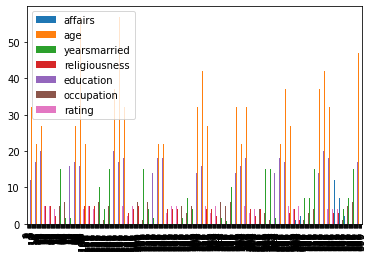

In [ ]:
#Bar Chart
df.plot(kind="bar")

The bar chart shows us the greatest numerical values in the data set. It must be made clear, that because of the differences in scales between the variables, the numeric values of this chart is inaccurate. The numbers are a representation of the scale in which they the responses were measured. 

Because of the difference in the scales, the numbers being representations, and not actual numeric values, it can be argued that our variables should be considered categorical and not numerical. 




---



#Decision Tree

Questions: We will be reviewing the conditions/likelihood of extramartial affairs given the variables in the data set. We will focus on the gender of the participants. 

Type of Model: Because of the type of variables in our data set, I believe a Decision Tree Model will best portray our answer. Most of our columns are categorical but are represented as numeric values. Thus, a decision tree would be the most effective method in tracing the conditions that would likely be present in extramartial affairs. 

Expected Answer: Based on the brief analysis we covered earlier, I believe age, and whether the participants have children are the major factors in whether or not they engage in an extramarital affair. This is because the age of the participants were recorded in the 'younger' section of the scale. Given that more than half of the participants have not commited an extramartial affair, we can assume that the older the participant, the more likely they are to have an affair. Whether or not the participant has children is another factor because children, or the lack of children, are a large part of a marriage. Socially, children are also effected by a extramartial affair, and it could be a large factor in whether the parents/participants would put them through that. 



---



## What are the conditions that create a difference in the likelihood of extra-marital affairs in **Men** and **Women**?

In [ ]:
df['children'].replace(['no', 'yes'], [0,1], inplace=True)

In [ ]:
df['gender'] = df['gender'].replace(['male', 'female'], [2,3])

In [ ]:
#Our feature variables
features_df = df.drop(['gender'],axis=1)
features_df.head()

affairs   age  yearsmarried  ...  education  occupation  rating
0        0  37.0         10.00  ...         18           7       4
1        0  27.0          4.00  ...         14           6       4
2        0  32.0         15.00  ...         12           1       4
3        0  57.0         15.00  ...         18           6       5
4        0  22.0          0.75  ...         17           6       3

[5 rows x 8 columns]

In [ ]:
#Our target variable
target_df = pd.DataFrame(df['gender']) # y_Train
target_df.head()

gender
0       2
1       3
2       3
3       2
4       2

In [ ]:
target_df= target_df.to_numpy()
target_df= target_df.flatten()
target_df

array([2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3,
       3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3,
       3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2,
       3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3,
       2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3,
       3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3,

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 20)

In [ ]:
dtree.fit(features_df, target_df)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [ ]:
viz = dtreeviz(dtree, 
               features_df,
               target_df,  
               target_name='gender',
               feature_names= features_df.columns, 
               class_names= ['Female', 'Male'] 
              )

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [ ]:
viz

Given our results, it seems that affairs in a marriage occur primarily based on the occupation of the particpants.

In [ ]:
predicted_labels = dtree.predict(features_df)
print("The Model Accuracy Is: {}".format(accuracy_score(target_df, predicted_labels)))

The Model Accuracy Is: 0.9883527454242929


Our model accuracy score is 98.88% accurate. 



---



## What are the primary causes of extra-martial affairs?

For this analysis, we are going to create a new dataset which ONLY focus's on affairs present in a marriage. Based on this data set, we can analyze the primary conditions that cause it. To do this, we will filter out all data entries that do NOT have an affair present.

In [ ]:
new_df = df
new_df.drop(df.index[df['affairs'] == 0], inplace = True)

In [ ]:
new_df.head()

affairs  gender   age  ...  education  occupation  rating
451        3       2  27.0  ...         18           4       4
452        3       3  27.0  ...         17           1       5
453        7       2  37.0  ...         18           6       2
454       12       3  32.0  ...         17           5       2
455        1       2  22.0  ...         16           5       5

[5 rows x 9 columns]

In [ ]:
new_df.describe()

affairs      gender         age  ...   education  occupation      rating
count  150.000000  150.000000  150.000000  ...  150.000000  150.000000  150.000000
mean     5.833333    2.480000   33.410000  ...   16.246667    4.313333    3.446667
std      4.255934    0.501274    8.614618  ...    2.479274    1.765199    1.212555
min      1.000000    2.000000   17.500000  ...    9.000000    1.000000    1.000000
25%      2.000000    2.000000   27.000000  ...   14.000000    3.000000    2.000000
50%      7.000000    2.000000   32.000000  ...   17.000000    5.000000    4.000000
75%     10.750000    3.000000   37.000000  ...   18.000000    6.000000    4.000000
max     12.000000    3.000000   57.000000  ...   20.000000    7.000000    5.000000

[8 rows x 9 columns]

By looking that the data set briefly, we can see that there only 150 data entries with an extramartial affair present. 

In [ ]:
#Our feature variables
new_features_df = new_df.drop(['gender'],axis=1)
new_features_df.head()

affairs   age  yearsmarried  ...  education  occupation  rating
451        3  27.0         1.500  ...         18           4       4
452        3  27.0         4.000  ...         17           1       5
453        7  37.0        15.000  ...         18           6       2
454       12  32.0        10.000  ...         17           5       2
455        1  22.0         0.125  ...         16           5       5

[5 rows x 8 columns]

In [ ]:
#Our target variable
new_target_df = pd.DataFrame(new_df['gender']) # y_Train
new_target_df.head()

gender
451       2
452       3
453       2
454       3
455       2

In [ ]:
new_target_df= new_target_df.to_numpy()
new_target_df= new_target_df.flatten()
new_target_df

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3,
       2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2,
       2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
       2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2,
       3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3])

In [ ]:
new_dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 15, max_leaf_nodes=35)

In [ ]:
new_dtree.fit(new_features_df, new_target_df)

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=35)

In [ ]:
new_viz = dtreeviz(new_dtree, 
               new_features_df,
               new_target_df,  
               target_name='gender',
               feature_names= new_features_df.columns, 
               class_names= ['Female', 'Male'] 
              )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


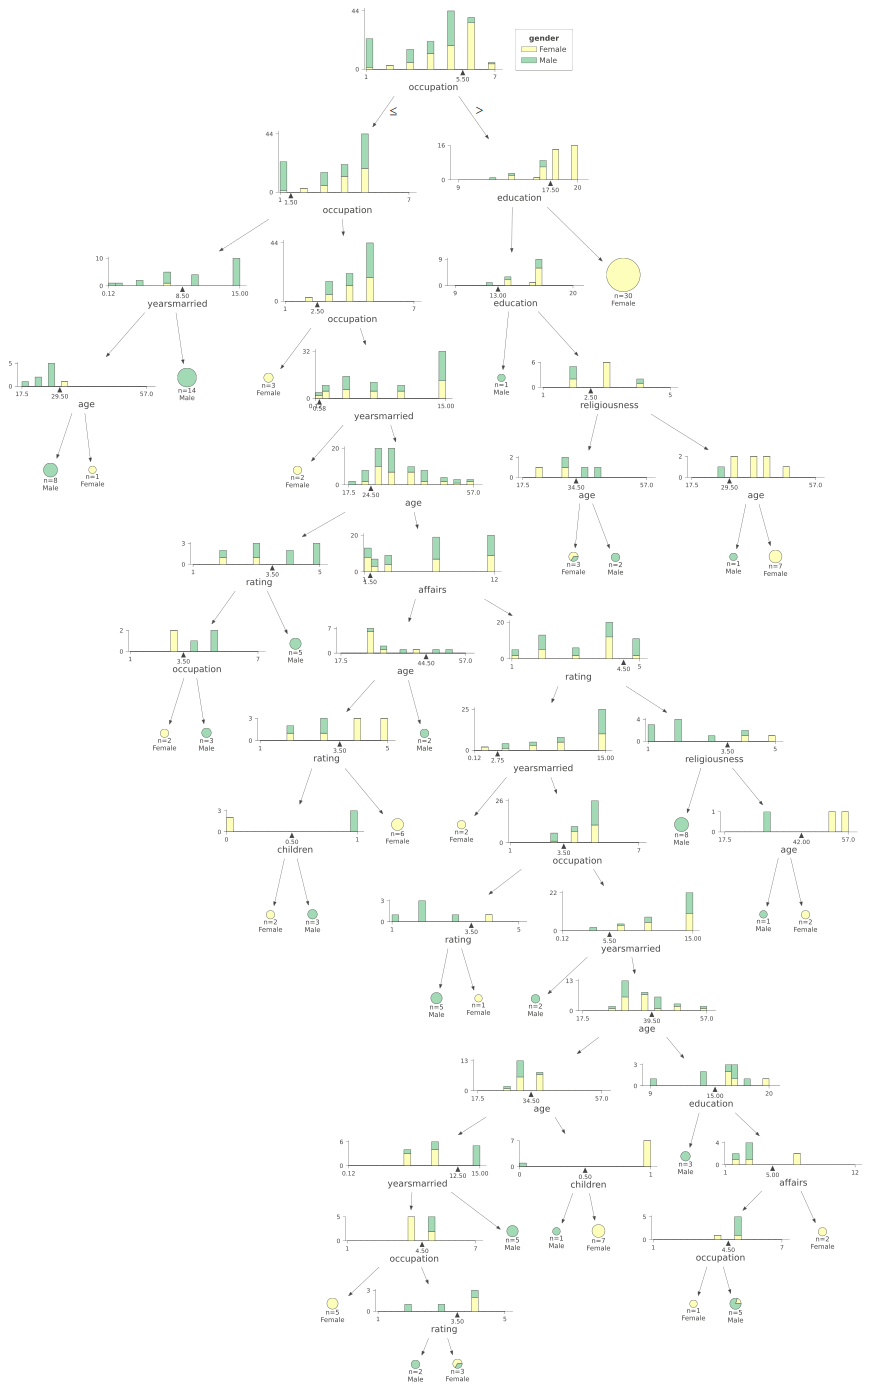

In [ ]:
new_viz

In [ ]:
new_predicted_labels = new_dtree.predict(new_features_df)
print("The Model Accuracy Is: {}".format(accuracy_score(new_target_df, new_predicted_labels)))

The Model Accuracy Is: 0.98


## Analysis of the New Decision tree

For both decision tree's, we see that the biggest factor for men and women when committing extramarital affairs is the occupation. Upon closer analysis of the data, and by researching the study the data set was referencing, we see that the numbers that correspond to the occuapation are different 'types' of jobs. 1 being a student, and 6 being a professional with an advanced degree. This corresponds to the level of education as well, as the factors that delegate the scale of measurement rely on each other. Meaning, if the participants occupation is counted as 1 (a student), then their level of education would be lower as well. This is true in the inverse as well. 



---




#NOTE

This study was conducted in 1978. This was a time period where the only marriages that were considered legal, and were included in this study, were between Men and Women.

Additionally, by looking at the scale of the research conducted, and the types of numerical values placed on arbritary types of 'occupations' or levels of education, we can conclude that this study does not reflect the population in 1978, OR 2021. 

Evidently, the research conducted, and our overall analysis, can only be correct for THIS particular study. My hypothesis about the stressors in a marriage, and the conditions that lead individuals to commit extramartial affairs was incorrect. I believe this is due, less to my incorrect hypothesis, and more to the skewed scale in the data set. 

The numbers do not have a cohesive value. Interpreting the results themself was quite difficult as I had to frequently refer back to the scale of the data set. 


I will include a link to the original study [here](https://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf). The appropriate page for the scales can be found on pages 53 and 54. 

#Conclusion

Given the data set, and the conclusions drawn by both decision trees, we see that occupation is the biggest factor in the difference between extramartial affairs in Men and Women. Occupation for this current data set, is also the biggest indicator to whether or not an extramartial affair will be conducted.  